In [1]:
!pip install pyreclab --upgrade

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreclab
import scipy.sparse as sparse
import seaborn as sns
import zipfile
import unzip
import time
import psutil

In [18]:
!wget https://uccl0-my.sharepoint.com/:u:/g/personal/aplaza2_uc_cl/EbcbEvjUBd1HiI6y6AB2eJgBvVtEcPJZ7gZTZHWJ7mhXWg?download=1 -O dataset_tarea1.zip
!unzip dataset_tarea1.zip
!rm -r dataset_tarea1.zip

--2024-09-13 21:43:26--  https://uccl0-my.sharepoint.com/:u:/g/personal/aplaza2_uc_cl/EbcbEvjUBd1HiI6y6AB2eJgBvVtEcPJZ7gZTZHWJ7mhXWg?download=1
Resolving uccl0-my.sharepoint.com (uccl0-my.sharepoint.com)... 13.107.138.10, 13.107.136.10, 2620:1ec:8f8::10, ...
Connecting to uccl0-my.sharepoint.com (uccl0-my.sharepoint.com)|13.107.138.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/aplaza2_uc_cl/Documents/Drives%20U/Sistemas%20Recomendadores%20Ayudantia/dataset_tarea1.zip?ga=1 [following]
--2024-09-13 21:43:27--  https://uccl0-my.sharepoint.com/personal/aplaza2_uc_cl/Documents/Drives%20U/Sistemas%20Recomendadores%20Ayudantia/dataset_tarea1.zip?ga=1
Reusing existing connection to uccl0-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 267635 (261K) [application/x-zip-compressed]
Saving to: ‘dataset_tarea1.zip’

dataset_tarea1.zip  100%[===================>] 261.36K  --.-KB/s    in 0.04s   

2024-09-13 21:43:27 (6.42 MB

In [21]:
train_file =  pd.read_csv('../data/training_set.csv')
valid_file =  pd.read_csv('../data/validation_set.csv')
items_styles = pd.read_csv('../data/items_styles.csv')

In [10]:
train_file = pd.read_csv('training_set.csv', sep=',', header=0)
train_file.head()

,userID,itemID,styleID,rating
0,401,32780,12224,3.0
1,7548,21688,9020,3.5
2,7663,1521,568,4.0
3,1357,3824,1417,3.5
4,1361,727,263,4.5


In [7]:
svd = pyreclab.SVD(dataset='training_set.csv',
                   dlmchar=b',',
                   header=False,
                   usercol=0,
                   itemcol=1,
                   ratingcol=3)

## Análisis de sensibilidad

In [4]:
factor_values = [50, 100, 150, 200, 250, 300]
mae_values = []
rmse_values = []
data_train = pd.read_csv('training_set.csv', sep=',', header=0)

for f in factor_values:
  svd.train(factors=f, maxiter=100, lr=0.01, lamb=0.1)

  predlist, mae, rmse = svd.test(input_file='validation_set.csv',
                                   dlmchar=b',',
                                   header=True,
                                   usercol=0,
                                   itemcol=1,
                                   ratingcol=3)

  mae_values.append(mae)
  rmse_values.append(rmse)

print(mae_values)
print(rmse_values)

[0.4473136925342259, 0.44612556247798185, 0.4453531867285465, 0.445479760571559, 0.4440894929406185, 0.4449679969691683]
[0.5959668257930979, 0.5961312864113196, 0.5947946279047588, 0.5943289703394732, 0.5934796972843467, 0.594467686257248]


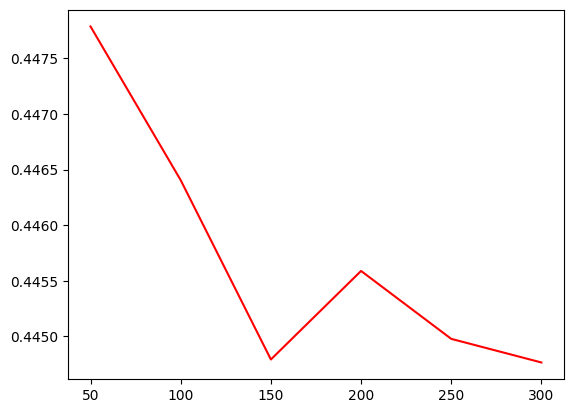

In [ ]:
plt.plot(factor_values, mae_values, 'r-')
plt.show()

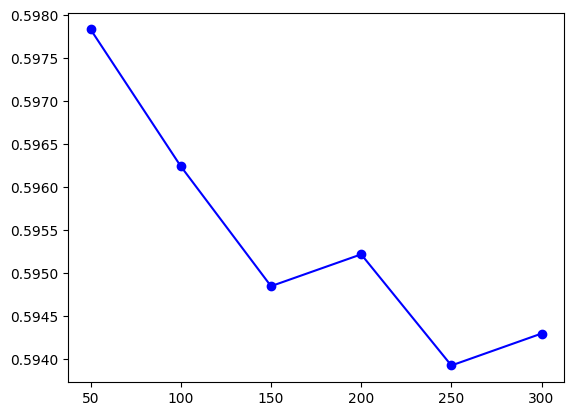

In [ ]:
plt.plot(factor_values, rmse_values, 'bo-')
plt.show()

## Análisis de sensibilidad - Hiperparametros

In [5]:
learning_rates = [0.001, 0.004, 0.007, 0.01, 0.013]
regularizations = [0.005, 0.01, 0.015, 0.02, 0.025]
factor_values = [50, 100, 150, 200, 250]
maxiter_values = [100, 150, 200, 250, 300]
lr_res = []
lamb_res = []
factor_res = []
rmse_res = []
maxiter_res = []

for fact in factor_values:
  for reg in regularizations:
    for lr in learning_rates:
        svd.train(factors=fact, maxiter=100, lr=lr, lamb=reg)
        predlist, mae, rmse = svd.test(input_file='validation_set.csv',
                               dlmchar=b',',
                               header=False,
                               usercol=0,
                               itemcol=1,
                               ratingcol=3)

        lr_res.append(lr)
        lamb_res.append(reg)
        factor_res.append(fact)
        rmse_res.append(rmse)
        #maxiter_res.append(maxiter)

In [5]:
learning_rates = [0.001, 0.004, 0.007, 0.01, 0.013]
regularizations = [0.005, 0.01, 0.015, 0.02, 0.025]
factor_values = [50, 100, 150, 200, 250]
lr_res = []
lamb_res = []
factor_res = []
rmse_res = []

for lr in learning_rates:
    for fact in factor_values:
        svd.train(factors=fact, maxiter=100, lr=lr, lamb=0.1)
        predlist, mae, rmse = svd.test(input_file='validation_set.csv',
                               dlmchar=b',',
                               header=False,
                               usercol=0,
                               itemcol=1,
                               ratingcol=3)

        lr_res.append(lr)
        #lamb_res.append(reg)
        factor_res.append(fact)
        rmse_res.append(rmse)

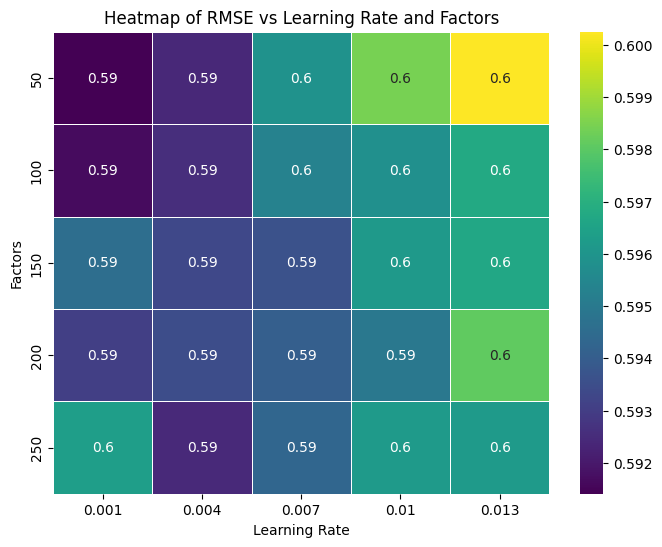

In [6]:
data = pd.DataFrame({
    'Learning Rate': lr_res,
    'Factors': factor_res,
    'RMSE': rmse_res
})

heatmap_data = data.pivot(index='Factors', columns='Learning Rate', values='RMSE')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of RMSE vs Learning Rate and Factors')
plt.show()

In [9]:
learning_rates = [0.001, 0.004, 0.007, 0.01, 0.013]
regularizations = [0.005, 0.01, 0.015, 0.02, 0.025]
factor_values = [50, 100, 150, 200, 250]
lr_res = []
lamb_res = []
factor_res = []
rmse_res = []

for reg in regularizations:
    for fact in factor_values:
        svd.train(factors=fact, maxiter=100, lr=0.001, lamb=reg)
        predlist, mae, rmse = svd.test(input_file='validation_set.csv',
                               dlmchar=b',',
                               header=False,
                               usercol=0,
                               itemcol=1,
                               ratingcol=3)

        #lr_res.append(lr)
        lamb_res.append(reg)
        factor_res.append(fact)
        rmse_res.append(rmse)

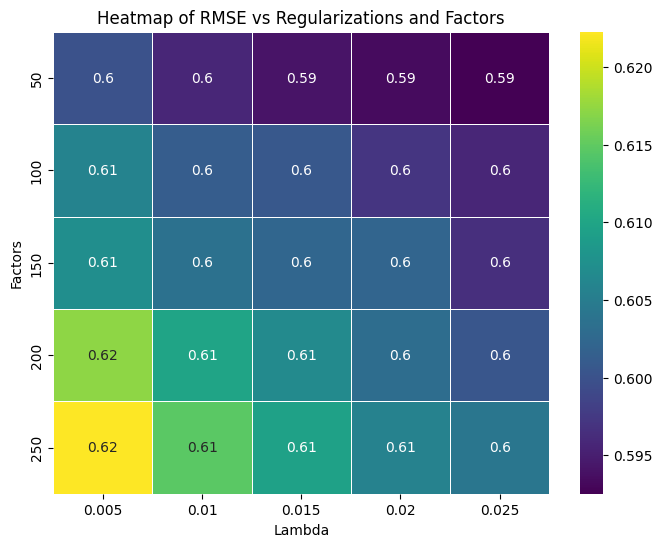

In [10]:
data = pd.DataFrame({
    'Lambda': lamb_res,
    'Factors': factor_res,
    'RMSE': rmse_res
})

heatmap_data = data.pivot(index='Factors', columns='Lambda', values='RMSE')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of RMSE vs Regularizations and Factors')
plt.show()

In [9]:
# Encontrar el índice del menor RMSE
min_rmse_index = rmse_res.index(min(rmse_res))

best_combination = {
    'Learning Rate': lr_res[min_rmse_index],
    'Regularization': lamb_res[min_rmse_index],
    'Factors': factor_res[min_rmse_index],
    'RMSE': rmse_res[min_rmse_index]
}

print("Mejor combinación de hiperparámetros:")
print(best_combination)

Mejor combinación de hiperparámetros:
{'Learning Rate': 0.001, 'Regularization': 0.025, 'Factors': 50, 'RMSE': 0.5932867505149496}


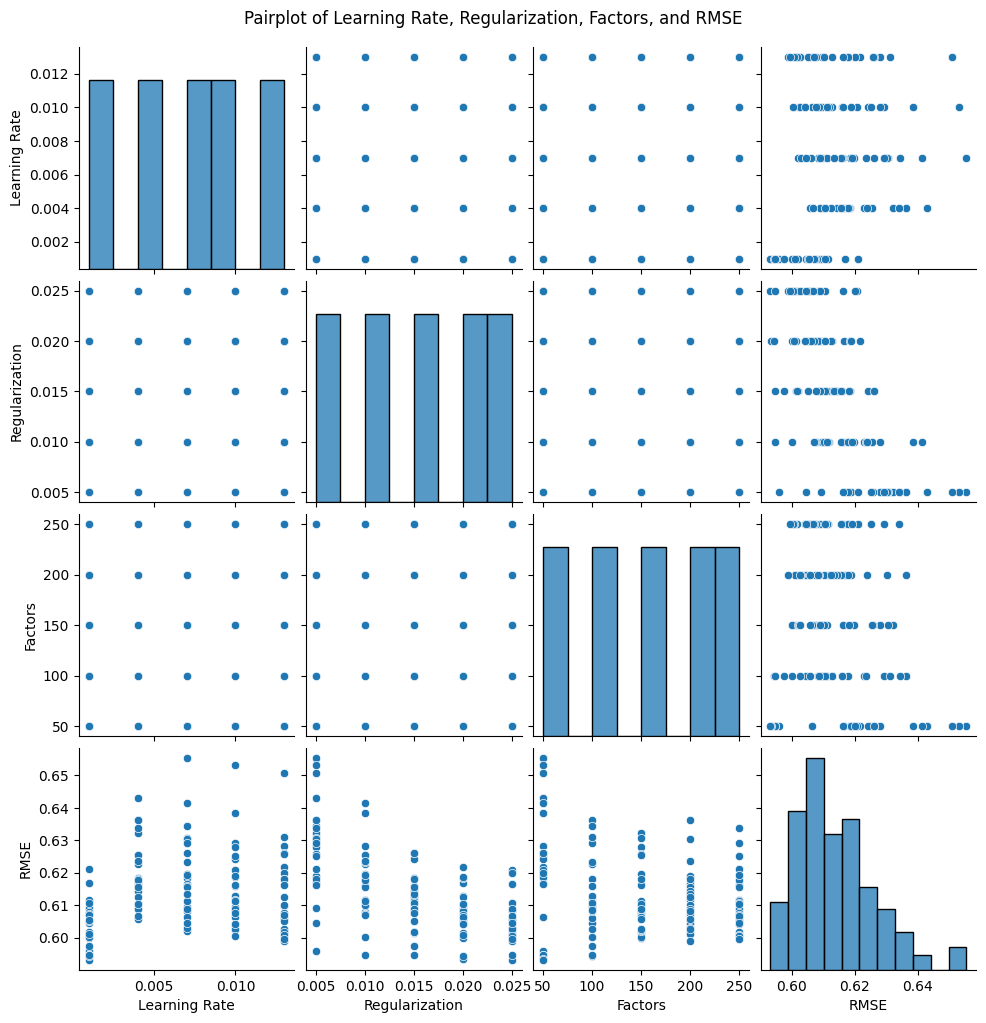

In [6]:
data = pd.DataFrame({
    'Learning Rate': lr_res,
    'Regularization': lamb_res,
    'Factors': factor_res,
    'RMSE': rmse_res
})

sns.pairplot(data)
plt.suptitle('Pairplot of Learning Rate, Regularization, Factors, and RMSE', y=1.02)
plt.show()

## Entrenar Modelo

In [23]:
svd = pyreclab.SVD(dataset='../data/training_set.csv', dlmchar=b',', header=False, usercol=0, itemcol=1, ratingcol=3)

In [27]:
start_time = time.time()
mem_info_before = psutil.virtual_memory().used
cpu_usage_before = psutil.cpu_percent(interval=None)

svd.train(factors=100, maxiter=100, lr=0.01, lamb=0.1)

end_time = time.time()
mem_info_after = psutil.virtual_memory().used
memory_used = (mem_info_after - mem_info_before) / (1024 ** 2)
cpu_usage_after = psutil.cpu_percent(interval=None)

print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")
print(f"Memoria utilizada: {memory_used} MB")
print(f"Uso de CPU: {cpu_usage_after - cpu_usage_before}%")

Tiempo de entrenamiento: 2.7732033729553223 segundos
Memoria utilizada: 0.23046875 MB
Uso de CPU: 6.4%


## Rating

In [29]:
rating_test = pd.read_csv('../templates/rating_template_fill.csv', sep=';', header=0)
rating_test.head()

,itemID,styleID,Rating,userID
0,39289,14756,NaN,715
1,3939,1417,NaN,4944
2,47695,14879,NaN,4890
3,7348,1199,NaN,5324
4,37403,1199,NaN,5544


In [30]:
# Función para obtener el promedio de ratings de un usuario en caso de que el item no esté en training
def user_average_rating(user_id, train_ratings):
    user_ratings = train_ratings[train_ratings['userID'] == user_id]['rating']
    if len(user_ratings) > 0:
        return user_ratings.mean()
    else:
        return train_ratings['rating'].mean()

# Lista de ítems en training
training_items = train_file['itemID'].unique()

In [34]:
for index, row in rating_test.iterrows():
    user_id = str(int(row.iloc[3]))
    item_id = str(int(row.iloc[0]))

    if int(item_id) not in training_items:
      rating = user_average_rating(user_id, train_file)
    else:
      rating = svd.predict(user_id, item_id)
    rating_test.at[index, 'Rating'] = round(rating,4)

In [35]:
rating_test.head()

,itemID,styleID,Rating,userID
0,39289,14756,4.1538,715
1,3939,1417,3.6235,4944
2,47695,14879,3.8353,4890
3,7348,1199,4.3181,5324
4,37403,1199,4.0232,5544


In [36]:
ruta = os.path.join('../predictions', 'rating_iknn.csv')
rating_test.to_csv(ruta, index=False)